In [1]:
import warnings
warnings.filterwarnings("ignore")

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from unidecode import unidecode
import colorsys

In [3]:
import numbersLanguage as nl

100%|██████████| 11/11 [00:00<00:00, 46.89it/s]


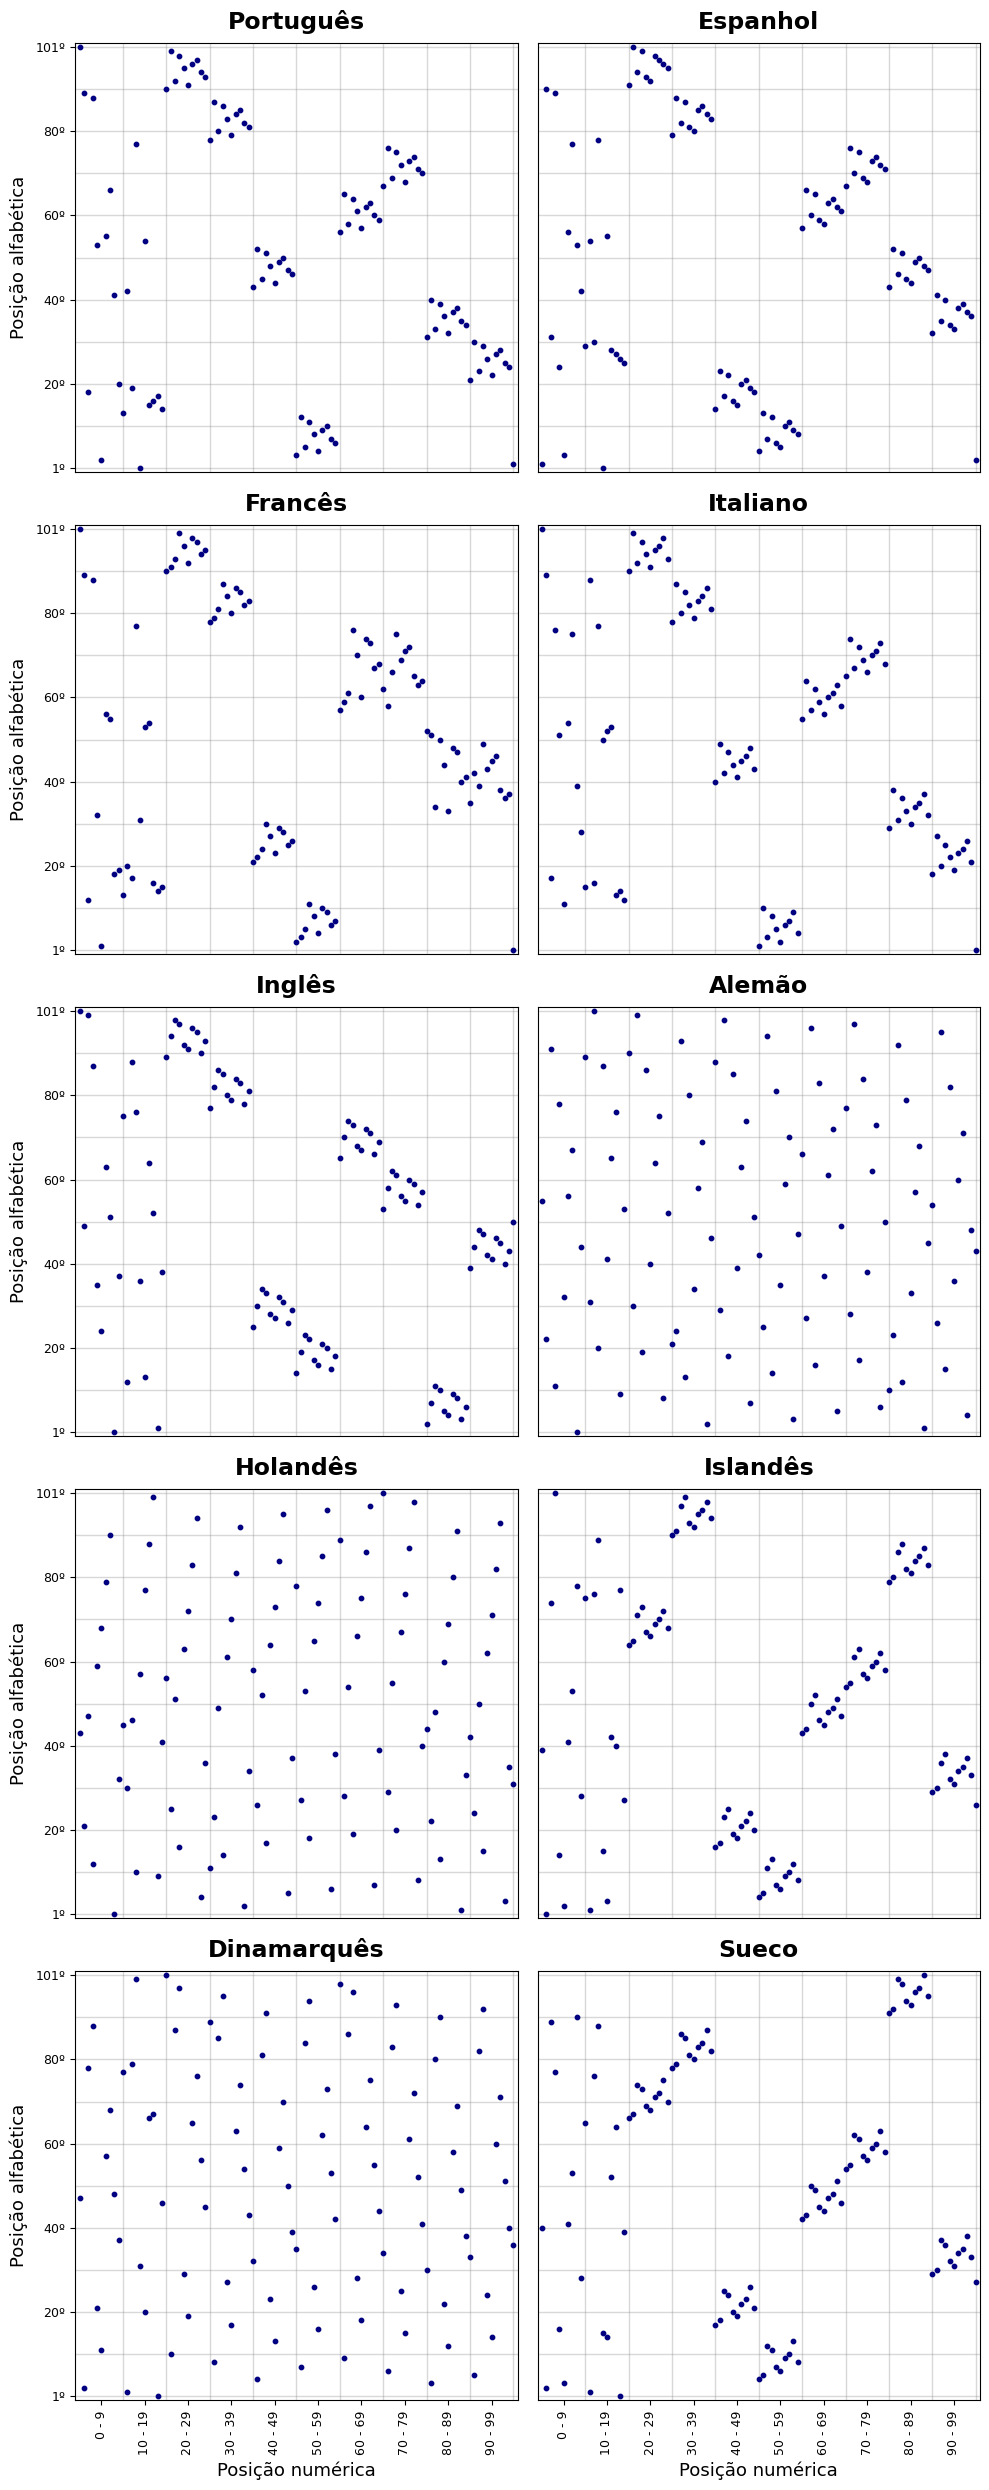

In [163]:
fig, axs = plt.subplots(5, 2, figsize=(10,25))
ax = axs.flatten()

numbers_languages = [nl.numbers_ptbr, nl.numbers_es, nl.numbers_fr, nl.numbers_it, nl.numbers_en,
                     nl.numbers_de, nl.numbers_nl, nl.numbers_is, nl.numbers_da, nl.numbers_sv,
                    nl.numbers_fo]
languages = ['Português', 'Espanhol', 'Francês', 'Italiano', 'Inglês', 'Alemão', 'Holandês',
             'Islandês', 'Dinamarquês', 'Sueco', 'Faroese']
all_numbers_alphabetic = []

for i in tqdm(range(len(numbers_languages))):
    numbers_language = numbers_languages[i]
    numbers_order = np.array([i for i in range(len(numbers_language))])
    numbers_alphabetic = []

    for number in numbers_language:
        position = np.where(np.array(sorted(numbers_language)) == number)[0][0]
        numbers_alphabetic.append(position)
        
    all_numbers_alphabetic.append(numbers_alphabetic)
    # ax[i].grid(True, lw = 1, color = 'grey', zorder = 0, alpha = 0.3, axis = 'y')
    if i < len(ax):
        ax[i].scatter(numbers_order, numbers_alphabetic, s = 10, color = 'navy')
        ax[i].set_xlim(-1, 101)
        ax[i].set_ylim(-1, 101)
        ax[i].set_title(languages[i], pad = 10, fontsize = 17, weight = 'bold')
        for j in range(1,11):
            ax[i].axvline(10*j, lw = 1, color = 'grey', zorder = 0, alpha = 0.3)
        for j in range(11):
            ax[i].axhline(10*j, lw = 1, color = 'grey', zorder = 0, alpha = 0.3)

        if i in [0,2,4,6]:
            ax[i].set_ylabel("Posição alfabética", fontsize = 13, labelpad = 5)
            ax[i].set_yticks([0,20,40,60,80,100])
            ax[i].set_yticklabels(["1º", "20º", "40º", "60º", "80º", "101º"], fontsize = 9)
            ax[i].set_xticks([])
        elif i == 8:
            ax[i].set_yticks([0,20,40,60,80,100])
            ax[i].set_yticklabels(["1º", "20º", "40º", "60º", "80º", "101º"], fontsize = 9)
            ax[i].set_ylabel("Posição alfabética", fontsize = 13, labelpad = 5)
            ax[i].set_xlabel("Posição numérica", fontsize = 13, labelpad = 5)
            ax[i].set_xticks([10*i - 5 for i in range(1,11)])
            ax[i].set_xticklabels([f"{10*i} - {10*(i+1) - 1}" for i in range(10)], fontsize = 9,
                                 rotation = 90)
        elif i == 9:
            ax[i].set_xlabel("Posição numérica", fontsize = 13, labelpad = 5)
            ax[i].set_xticks([10*i - 5 for i in range(1,11)])
            ax[i].set_xticklabels([f"{10*i} - {10*(i+1) - 1}" for i in range(10)], fontsize = 9,
                                 rotation = 90)
            ax[i].set_yticks([])
        else:
            ax[i].set_xticks([])
            ax[i].set_yticks([])

plt.tight_layout()
plt.savefig('Languages_number_ordering.svg', dpi = 300, bbox_inches = 'tight')
plt.show()

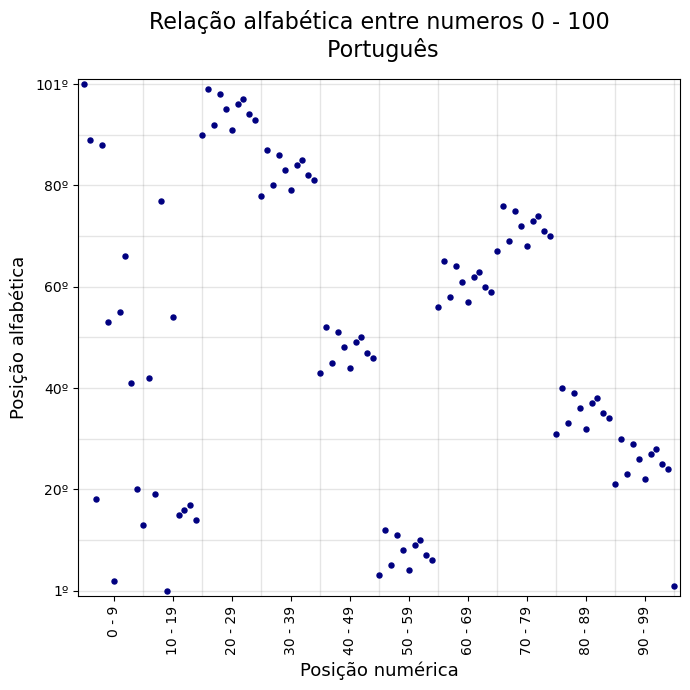

In [165]:
fig, ax = plt.subplots(figsize=(7,7))

numbers_languages = [nl.numbers_ptbr, nl.numbers_es, nl.numbers_fr, nl.numbers_it, nl.numbers_en,
                     nl.numbers_de, nl.numbers_nl, nl.numbers_is, nl.numbers_da, nl.numbers_sv,
                    nl.numbers_fo]

ax.scatter([i for i in range(len(all_numbers_alphabetic[0]))], all_numbers_alphabetic[0],
           s = 13, color = 'navy', label = 'Português')
# ax.scatter([i for i in range(len(all_numbers_alphabetic[1]))], all_numbers_alphabetic[1],
#            s = 13, color = 'crimson', label = 'Espanhol')

# for i in range(101):
#     ax.vlines(i, all_numbers_alphabetic[0][i], all_numbers_alphabetic[1][i],
#               color = 'black', lw = 1, zorder = 0)
    
xmax = 101
ax.set_xlim(-1, xmax)
ax.set_ylim(-1, 101)
# ax.set_title('Português', pad = 10, fontsize = 17, weight = 'bold')
for j in range(1,11):
    ax.axvline(10*j, lw = 1, color = 'grey', zorder = 0, alpha = 0.2)
for j in range(11):
    ax.axhline(10*j, lw = 1, color = 'grey', zorder = 0, alpha = 0.2)
    
ax.set_yticks([0,20,40,60,80,100])
ax.set_yticklabels(["1º", "20º", "40º", "60º", "80º", "101º"], fontsize = 10)
ax.set_ylabel("Posição alfabética", fontsize = 13, labelpad = 5)
ax.set_xlabel("Posição numérica", fontsize = 13, labelpad = 5)
ax.set_xticks([10*i - 5 for i in range(1,xmax//10 + 1)])
ax.set_xticklabels([f"{10*i} - {10*(i+1) - 1}" for i in range(xmax//10)], fontsize = 10,
                     rotation = 90)

ax.set_title("Relação alfabética entre numeros 0 - 100\n Português", fontsize = 16, pad = 16)

# plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, 1), ncol = 2, fontsize = 11)
plt.tight_layout()
plt.savefig('Languages_ptbr.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [41]:
all_numbers_alphabetic = np.array(all_numbers_alphabetic)

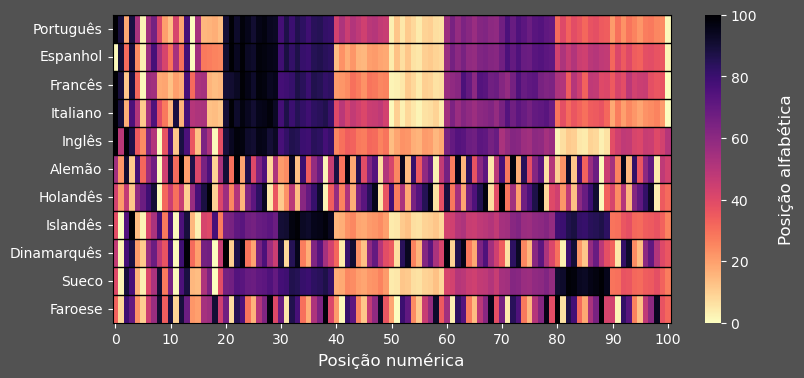

In [110]:
fig, ax = plt.subplots(figsize = (9,4))
heat = sns.heatmap(all_numbers_alphabetic, ax = ax, vmax = 100, vmin = 0, cmap = 'magma_r')
cb = heat.collections[0].colorbar
cb.set_label("Posição alfabética", size = 12, rotation = 90, labelpad = 15,
            color = 'white')
cb.ax.set_yticklabels([0,20,40,60,80,100], color = 'white')
cb.ax.tick_params(labelsize = 10, color = 'white')
ax.set_yticklabels(languages, rotation = 0, color = 'white')
ax.set_xticks([10*i + 0.5 for i in range(11)])
ax.set_xticklabels([0,10,20,30,40,50,60,70,80,90,100], rotation = 0, color = 'white')
for i in range(len(languages)):
    ax.axhline(i, lw = 1, color = 'black')
    
ax.spines[['left','bottom','top','right']].set_visible(True)
ax.tick_params(axis='both', color='white')
ax.set_xlabel("Posição numérica", color = 'white', fontsize = 12)

fig.patch.set_facecolor('#525252')
plt.savefig("Language_number_heatmap.svg", dpi = 300, bbox_inches = 'tight')
plt.savefig("Language_number_heatmap.png", dpi = 300, bbox_inches = 'tight')
plt.show()

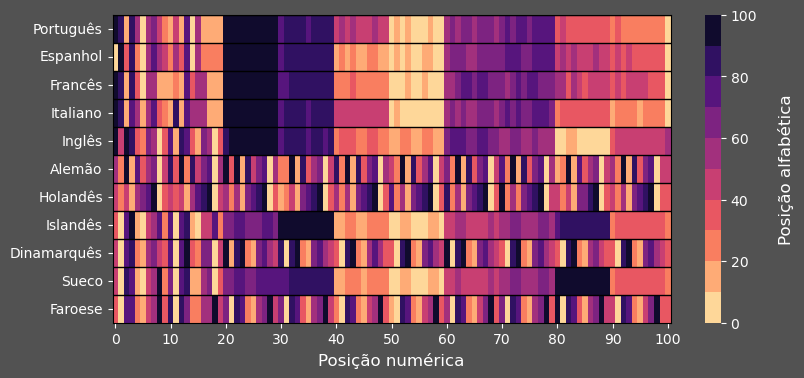

In [146]:
cmap = LinearSegmentedColormap.from_list('Custom',
                                         [sns.color_palette('magma_r', 11)[i] for i in range(11)],
                                         10)

fig, ax = plt.subplots(figsize = (9,4))
heat = sns.heatmap(all_numbers_alphabetic, ax = ax, vmax = 100, vmin = 0, cmap = cmap)
cb = heat.collections[0].colorbar
cb.set_label("Posição alfabética", size = 12, rotation = 90, labelpad = 15,
            color = 'white')
cb.ax.set_yticklabels([0,20,40,60,80,100], color = 'white')
cb.ax.tick_params(labelsize = 10, color = 'white')

ax.set_yticklabels(languages, rotation = 0, color = 'white')
ax.set_xticks([10*i + 0.5 for i in range(11)])
ax.set_xticklabels([0,10,20,30,40,50,60,70,80,90,100], rotation = 0, color = 'white')
for i in range(len(languages)):
    ax.axhline(i, lw = 1, color = 'black')
    
ax.spines[['left','bottom','top','right']].set_visible(True)
ax.tick_params(axis='both', color='white')
ax.set_xlabel("Posição numérica", color = 'white', fontsize = 12)

fig.patch.set_facecolor('#525252')
plt.savefig("Language_number_heatmap_2.svg", dpi = 300, bbox_inches = 'tight')
plt.savefig("Language_number_heatmap_2.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [48]:
similarity = np.zeros((all_numbers_alphabetic.shape[0], all_numbers_alphabetic.shape[0]))

for i in range(all_numbers_alphabetic.shape[0]):
    for j in range(all_numbers_alphabetic.shape[0]):
        similarity[i,j] = np.median(np.abs(all_numbers_alphabetic[i] - all_numbers_alphabetic[j]))

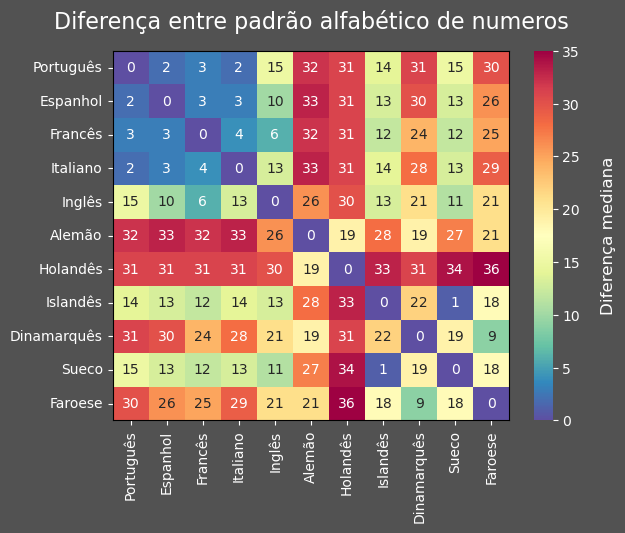

In [159]:
fig, ax = plt.subplots()

heat = sns.heatmap(similarity,  annot = True, ax = ax, vmax = 35, vmin = 0, cmap = 'Spectral_r')
cb = heat.collections[0].colorbar
cb.set_label("Diferença mediana", size = 12, rotation = 90, labelpad = 15,
            color = 'white')
cb.ax.set_yticklabels([0,5,10,15,20,25,30,35], color = 'white')
cb.ax.tick_params(labelsize = 10, color = 'white')

ax.set_yticklabels(languages, rotation = 0, color = 'white')
ax.set_xticklabels(languages, rotation = 90, color = 'white')
    
ax.spines[['left','bottom','top','right']].set_visible(True)
ax.tick_params(axis='both', color='white')

ax.set_title("Diferença entre padrão alfabético de numeros", fontsize = 16,
            pad = 16, color = 'white')

fig.patch.set_facecolor('#525252')
plt.savefig("Language_difference.svg", dpi = 300, bbox_inches = 'tight')
plt.savefig("Language_difference.png", dpi = 300, bbox_inches = 'tight')
plt.show()